In [1]:
#important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load dataset.

In [2]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
data.head()
#print(data.tail())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#some random values from our data
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
343,5,122,86,0,0,34.7,0.290,33,0
556,1,97,70,40,0,38.1,0.218,30,0
611,3,174,58,22,194,32.9,0.593,36,1
627,0,132,78,0,0,32.4,0.393,21,0
380,1,107,72,30,82,30.8,0.821,24,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [7]:
#check is there any NaN value.
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

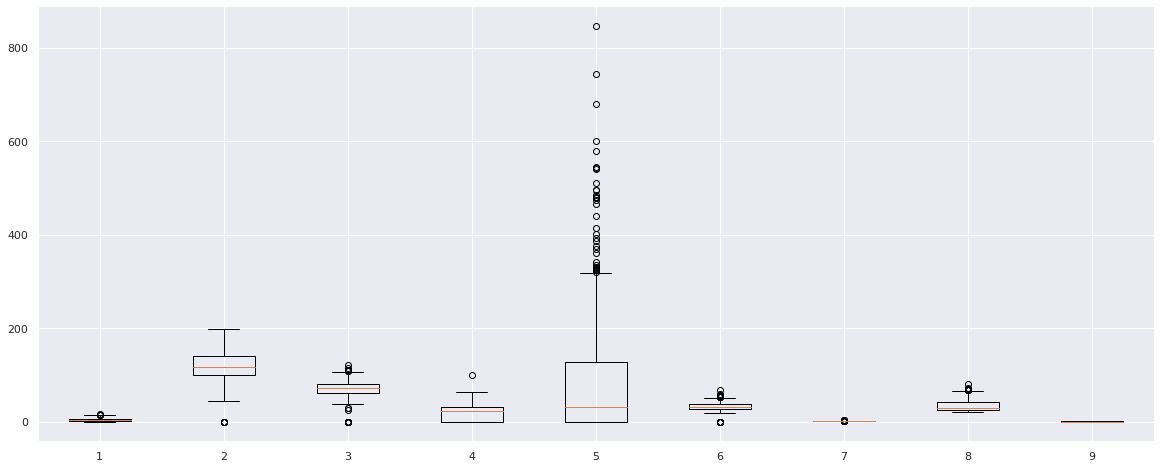

In [8]:
#let's check outlier now.
plt.figure(figsize=(20,8))
plt.boxplot(data)
plt.show()

outliner seen in column 5


In [9]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

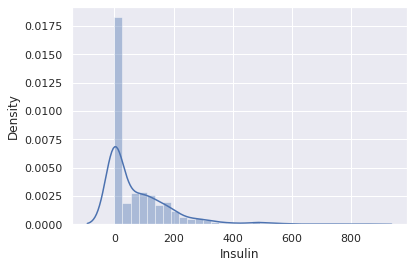

In [10]:
sns.distplot(data["Insulin"])

Here, remove top 1% outlier in Insulin attribute   

In [11]:
q=data['Insulin'].quantile(.99)
data1=data[data['Insulin']<q]

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

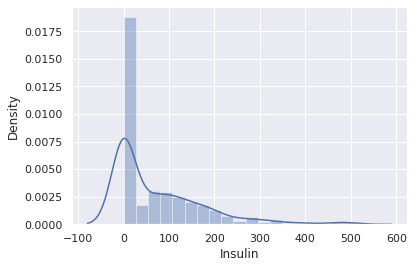

In [12]:
sns.distplot(data1["Insulin"])

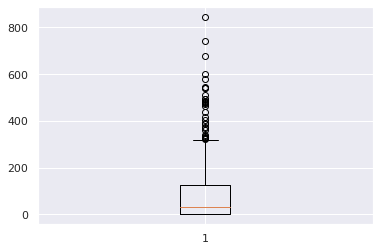

In [13]:
plt.boxplot(data['Insulin'])
plt.show()

# EDA

Firstly lets check that if our data is balanced or not

In [14]:
 bl=data['Outcome'].value_counts()

<AxesSubplot:>

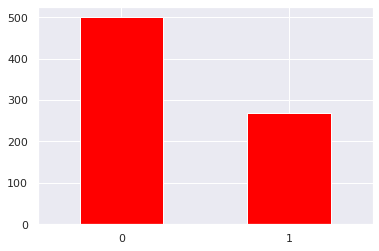

In [15]:
bl.plot(kind='bar',rot=360,color='red')

Our Data is clearly not balanced. We will balance this data using SMOTE technique after some visualizations.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


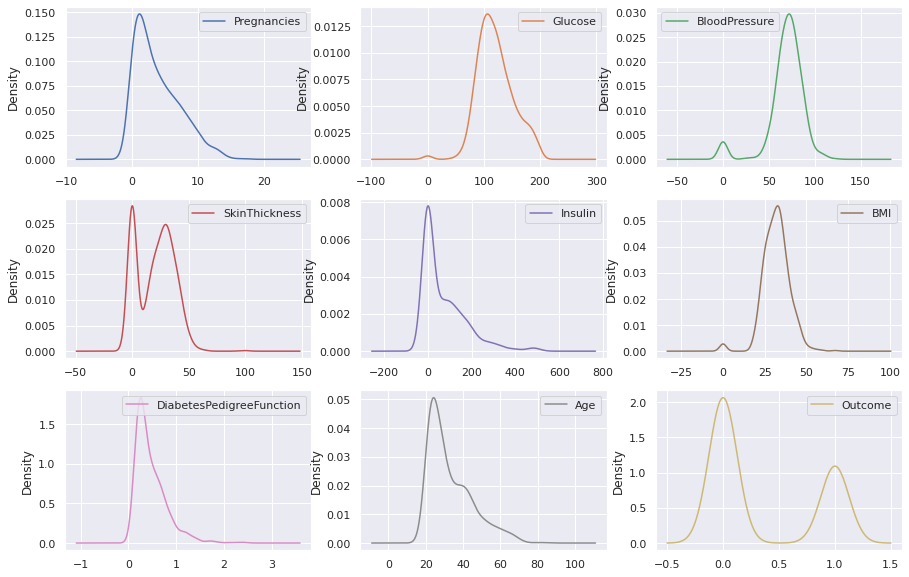

In [16]:
data1.plot(kind= 'kde' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

It seems like most attributes are normally distributed.

In [17]:
# Create a correlation matrix
corr_metrics =data1.corr()

corr_metrics.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.139892,0.141520,-0.078805,-0.066434,0.023692,-0.036882,0.549059,0.226310
Glucose,0.139892,1.000000,0.154483,0.041520,0.295527,0.215345,0.127173,0.261808,0.468469
BloodPressure,0.141520,0.154483,1.000000,0.206952,0.097152,0.280873,0.040512,0.242664,0.069291
SkinThickness,-0.078805,0.041520,0.206952,1.000000,0.456171,0.389565,0.180389,-0.117463,0.071634
Insulin,-0.066434,0.295527,0.097152,0.456171,1.000000,0.191871,0.170401,-0.077405,0.119709
BMI,0.023692,0.215345,0.280873,0.389565,0.191871,1.000000,0.139903,0.043352,0.298303
DiabetesPedigreeFunction,-0.036882,0.127173,0.040512,0.180389,0.170401,0.139903,1.000000,0.036962,0.185848
Age,0.549059,0.261808,0.242664,-0.117463,-0.077405,0.043352,0.036962,1.000000,0.233129
Outcome,0.226310,0.468469,0.069291,0.071634,0.119709,0.298303,0.185848,0.233129,1.000000


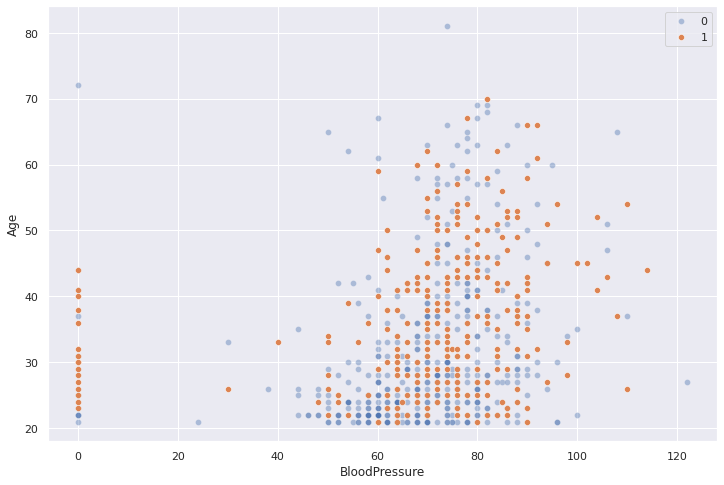

In [18]:
# Age vs BloodPressure with hue = Outcome
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="BloodPressure", y="Age", alpha=0.4,label="0", data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Age", alpha=1, label="1",data=data[data['Outcome'] == 1], ax=ax)
plt.show()

first, Bloodpressure never be zero

reference 
#https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/
2
https://www.quora.com/What-will-happen-when-the-blood-pressure-goes-zero

In [19]:
data2 = data1[data1['BloodPressure'] != 0]

In [20]:
#crosscheck
sum(data2['BloodPressure']==0)

0

In [21]:
# Splitting into features and value to be predicted
X = data2.drop(columns=['Outcome'])
y = data2['Outcome']



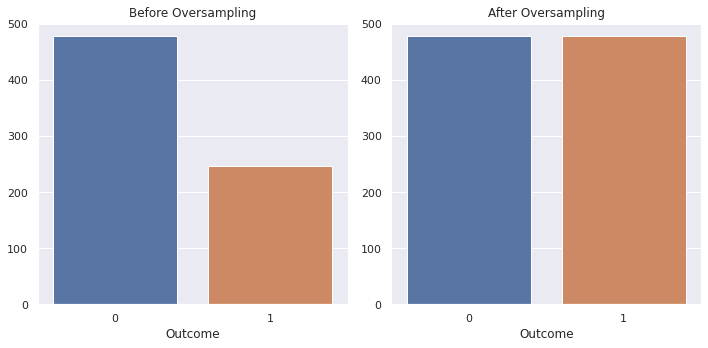

In [22]:
fig, ax = plt.subplots(1,2 ,figsize = (10,5))

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[0])
ax[0].set_title("Before Oversampling")
ax[0].set_xlabel('Outcome')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[1])
ax[1].set_title("After Oversampling")
ax[1].set_xlabel('Outcome')

plt.tight_layout()
plt.show()

Split data into train and test 

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


## SVM(support vector machine)

In [24]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler


pipe1 = make_pipeline(MinMaxScaler(), SVC())
pipe2 = make_pipeline(Normalizer(), SVC())
pipe3 = make_pipeline(RobustScaler(), SVC())
pipe4 = make_pipeline(StandardScaler(), SVC())

In [25]:
parameter = {'svc__C': [0.001,0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100,200],
              'svc__gamma': [0.001,0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100,200]} 

In [26]:
# for minmaxscaler
grid = GridSearchCV(pipe1,parameter, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Test error rate:", 1-grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.7923128717315677
Test set score: 0.7979094076655052
Test error rate: 0.20209059233449478
Best parameters: {'svc__C': 2, 'svc__gamma': 20}


In [27]:
#for Normalizer
grid = GridSearchCV(pipe2,parameter, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Test error rate:", 1-grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.7457748849736282
Test set score: 0.7456445993031359
Test error rate: 0.25435540069686413
Best parameters: {'svc__C': 20, 'svc__gamma': 50}


In [28]:
#RobustScaler
grid = GridSearchCV(pipe3,parameter, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Test error rate:", 1-grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.8013017618673549
Test set score: 0.7770034843205574
Test error rate: 0.22299651567944256
Best parameters: {'svc__C': 2, 'svc__gamma': 1}


In [29]:
# StandardScaler
grid = GridSearchCV(pipe4,parameter, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Test error rate:", 1-grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.7998204466389855
Test set score: 0.8048780487804879
Test error rate: 0.19512195121951215
Best parameters: {'svc__C': 1, 'svc__gamma': 0.5}


In [30]:
prediction = grid.predict(X_test)
prediction

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[111,  35],
       [ 21, 120]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8048780487804879

Let's check by entering data manually

In [33]:
prediction = grid.predict([[1,100,80,35,80,23.3,0.67,32]])
prediction

array([0])

It means patient don't have Diabetes